
<font size='5' face='Californian FB'>Name - Zal Patel</font><br><br>
<font size='5' face='Californian FB'>Student ID - 31553988 </font><br><br>
<font size='5' face='Californian FB'>Project - FINAL PROJECT</font><br><br>
<font size='5' face='Californian FB'>Date - 12/04/2021</font>

# **Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score

# **Reading CSV File**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/creditcard.csv'
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# **Output and Description**

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Normalization & Train-Test Split**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [12]:
df = df.drop(['Amount','Time'],axis=1)

y = df['Class']

X = df.drop(['Class'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

# **RANDOM FOREST**

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# RforestMdl = RandomForestClassifier(n_estimators = 100)
# RforestMdl.fit(X_train, y_train)
# y_pred = RforestMdl.predict(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
mAucrf = []
i = 1
kfld = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in kfld.split(X, y):
    print('\n{} of k - fold {}'.format(i, kfld.n_splits))
    trnX, valx = X.loc[train_index], X.loc[test_index]
    trnY, valy = y[train_index], y[test_index]
    
    Rforestmdl = RandomForestClassifier(n_estimators = 100)
    Rforestmdl.fit(trnX, trnY)
    predictionT = Rforestmdl.predict(valx)
    
    cm = confusion_matrix(valy, predictionT)
    TPrf = cm[1][1]
    TNrf = cm[0][0]
    FPrf = cm[0][1]
    FNrf = cm[1][0]

    print('Confusion Matrix:\n',cm)

    conf_accuracy = (float (TPrf+TNrf) / float(TPrf + TNrf + FPrf + FNrf))
    conf_misclassification = 1- conf_accuracy
    conf_sensitivity = (TPrf / float(TPrf + FNrf))
    conf_specificity = (TNrf / float(TNrf + FPrf))
    conf_precision = (TPrf/ float(TPrf+ FPrf))
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    tssrf=conf_sensitivity-(1-conf_specificity)
    hssrf=(2*(TPrf*TNrf-FPrf*FNrf))/(((TPrf+FNrf)*(FNrf+TNrf))+((TPrf+FPrf)*(FPrf+TNrf)))
    #print('Confusion Matrix: \n', cm)
    score = conf_accuracy * 100
    print('Accuracy is:', score, '%')
    mAucrf.append(score)
    print("Misclassification: ",conf_misclassification,'Sensitivity: ',conf_sensitivity,"Specificity: ",conf_specificity,'\n','Precision: ',conf_precision,"f1: ",conf_f1,"TSS: ",tssrf,"hss:",hssrf)
    i= i + 1
    
print("\nMean Validation Accuracy: ", sum(mAucrf)/len(mAucrf) , '%')


1 of k - fold 10
Confusion Matrix:
 [[28430     2]
 [   10    39]]
Accuracy is: 99.95786664794073 %
Misclassification:  0.0004213335205927038 Sensitivity:  0.7959183673469388 Specificity:  0.9999296567248172 
 Precision:  0.9512195121951219 f1:  0.8666666666666666 TSS:  0.7958480240717559 hss: 0.8664573363050118

2 of k - fold 10
Confusion Matrix:
 [[28429     3]
 [   12    37]]
Accuracy is: 99.94733330992591 %
Misclassification:  0.0005266669007408797 Sensitivity:  0.7551020408163265 Specificity:  0.9998944850872257 
 Precision:  0.925 f1:  0.8314606741573034 TSS:  0.7549965259035522 hss: 0.8311996298533836

3 of k - fold 10
Confusion Matrix:
 [[28431     1]
 [    8    41]]
Accuracy is: 99.96839998595554 %
Misclassification:  0.00031600014044452784 Sensitivity:  0.8367346938775511 Specificity:  0.9999648283624085 
 Precision:  0.9761904761904762 f1:  0.9010989010989012 TSS:  0.8366995222399596 hss: 0.9009415861078853

4 of k - fold 10
Confusion Matrix:
 [[28430     2]
 [   10    39]]

# **K-Nearest Neighbor Algorithm**

In [16]:
from sklearn import preprocessing as prp
X_train = prp.normalize(X_train)
X_test = prp.normalize(X_test)

In [17]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

# accuracy_score(y_test, y_pred) * 100

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
mAucKnn = []
i = 1
kfld = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in kfld.split(X, y):
    print('\n{} of k - fold {}'.format(i, kfld.n_splits))
    trnX, valx = X.loc[train_index], X.loc[test_index]
    trnY, valy = y[train_index], y[test_index]
    
    KnnMdl = KNeighborsClassifier(n_neighbors=3)
    KnnMdl.fit(trnX, trnY)
    predictionT = KnnMdl.predict(valx)
    
    #score = accuracy_score(valy, predictionT) * 100
    #score = (np.sum(np.equal(valy,predictionT))/len(valy)) * 100
    cm = confusion_matrix(valy, predictionT)
    TPKnn = cm[1][1]
    TNKnn = cm[0][0]
    FPKnn = cm[0][1]
    FNKnn = cm[1][0]

    print('Confusion Matrix: ',cm)

    conf_accuracy = (float (TPKnn+TNKnn) / float(TPKnn + TNKnn + FPKnn + FNKnn))
    conf_misclassification = 1- conf_accuracy
    conf_sensitivity = (TPKnn / float(TPKnn + FNKnn))
    conf_specificity = (TNKnn / float(TNKnn + FPKnn))
    conf_precision = (TPKnn/ float(TPKnn+ FPKnn))
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    tssKnn=conf_sensitivity-(1-conf_specificity)
    hssKnn=(2*(TPKnn*TNKnn-FPKnn*FNKnn))/(((TPKnn+FNKnn)*(FNKnn+TNKnn))+((TPKnn+FPKnn)*(FPKnn+TNKnn)))
    #print('Confusion Matrix: \n', cm)
    score = conf_accuracy * 100
    print('Accuracy is:', score, '%')
    mAucKnn.append(score)
    print("Misclassification: ",conf_misclassification,'Sensitivity: ',conf_sensitivity,"Specificity: ",conf_specificity,'\n','Precision: ',conf_precision,"f1: ",conf_f1,"tss: ",tssKnn,"hss:",hssKnn)
    i= i + 1
    
print("\nMean Validation Accuracy: ", sum(mAucKnn)/len(mAucKnn), '%')


1 of k - fold 10
Confusion Matrix:  [[28428     4]
 [   12    37]]
Accuracy is: 99.9438221972543 %
Misclassification:  0.0005617780274569384 Sensitivity:  0.7551020408163265 Specificity:  0.9998593134496342 
 Precision:  0.9024390243902439 f1:  0.8222222222222222 tss:  0.7549613542659607 hss: 0.8219431150733489

2 of k - fold 10
Confusion Matrix:  [[28431     1]
 [   13    36]]
Accuracy is: 99.95084442259751 %
Misclassification:  0.0004915557740248211 Sensitivity:  0.7346938775510204 Specificity:  0.9999648283624085 
 Precision:  0.972972972972973 f1:  0.8372093023255813 tss:  0.734658705913429 hss: 0.8369679524397524

3 of k - fold 10
Confusion Matrix:  [[28429     3]
 [    7    42]]
Accuracy is: 99.96488887328394 %
Misclassification:  0.0003511112671605865 Sensitivity:  0.8571428571428571 Specificity:  0.9998944850872257 
 Precision:  0.9333333333333333 f1:  0.8936170212765957 tss:  0.8570373422300828 hss: 0.8934414944006369

4 of k - fold 10
Confusion Matrix:  [[28429     3]
 [   1

# **LSTM**

In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

class LSTM_model(object):

    def init(self):
        self.model = Sequential()

    def read_data(self):
        X = pd.read_csv('/content/drive/MyDrive/creditcard.csv', na_filter=True)

        y_original = np.array(X['Class'], dtype='float')

        X.drop(['Class'], inplace=True, axis=1)

        rolling_window_size = 10  ### this selects how many historical transactions should be analyzed to judge the transaction at hand -- RNN width

        X_interim = np.zeros([(X.shape[0]-rolling_window_size)*10,30])
        y = []
        for i in range((X.shape[0]-rolling_window_size)):
            beg = 0+i
            end = beg+rolling_window_size
            s = np.array(X[beg:end], dtype='float')
            X_interim[(rolling_window_size*i):(rolling_window_size*(i+1)),:] = s
            y.append(y_original[end])
            # print(i)
        
        y = np.array(y, dtype='float')
        X_interim = X_interim[:,1::]
        X_tensor = X_interim.reshape(int(np.shape(X_interim)[0]/rolling_window_size), rolling_window_size, np.shape(X_interim)[1])



        test_train_split = 0.5
        stratify = True

        if stratify:
            y = np.vstack((range(len(y)),y)).T
            y_pos = y[y[:,1]==1]
            y_neg = y[y[:,1]==0]
            
            y_pos = y_pos[np.random.choice(y_pos.shape[0], int(y_pos.shape[0]*test_train_split), replace=False),:]
            y_neg = y_neg[np.random.choice(y_neg.shape[0], int(y_neg.shape[0]*test_train_split), replace=False),:]
            
            train_idx = np.array(np.hstack((y_pos[:,0],y_neg[:,0])), dtype='int')
            
            X_train = X_tensor[train_idx, :, :]
            X_test = np.delete(X_tensor, train_idx, axis=0)
            y_train = y[train_idx,1]
            y_test = np.delete(y, train_idx, axis=0)
            y_test = y_test[:,1]
        else: 
            train_idx = np.random.choice(X_tensor.shape[0], int(X_tensor.shape[0]*test_train_split), replace=False)
            X_train = X_tensor[train_idx, :, :]
            X_test = np.delete(X_tensor, train_idx, axis=0)
            y_train = y[train_idx]
            y_test = np.delete(y, train_idx, axis=0)

        # del (X_tensor, y, stratify, test_train_split, train_idx, y_neg, y_pos)

        return X_train, X_test, y_train, y_test, X_train.shape[1:]
    
    def model_select(self,X_train):
        model = Sequential()
        model.add(LSTM(20, input_shape=X_train, kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=regularizers.l1(0.1), recurrent_regularizer=regularizers.l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
        # model.add(LSTM(12, activation='relu', return_sequences=True))
        #model.add(LSTM(8, activation='relu'))
        model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer='rmsprop'
        print(model.summary())
        return model
    
    def model_fit(self,X_train,y_train,epochs=15,batch_size=128,validation_split=0.1):
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
        return model

    def model_predict(self,model):
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        return train_predict, test_predict


ls = LSTM_model()
X_train, X_test, y_train, y_test, size = ls.read_data()

print(size)

model = ls.model_select(size)
model = ls.model_fit(X_train,y_train)
train_predict, test_predict = ls.model_predict(model)

fpr, tpr, thresholds = roc_curve(y_train, train_predict, pos_label=1)
print('TRAIN | AUC Score: ' + str((metrics.auc(fpr, tpr))))
fpr, tpr, thresholds = roc_curve(y_test, test_predict, pos_label=1)
print('TEST | AUC Score: ' + str((metrics.auc(fpr, tpr))))



(10, 29)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                4000      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1002/1002 [==============================] - 23s 19ms/step - loss: 6.1147 - accuracy: 0.9634 - val_loss: 0.5171 - val_accuracy: 1.0000
Epoch 2/15
1002/1002 [==============================] - 18s 18ms/step - loss: 0.3179 - accuracy: 0.9980 - val_loss: 0.1766 - val_accuracy: 1.0000
Epoch 3/15
1002/1002 [==============================] - 18s 18ms/step - loss: 0.1334 - accuracy: 0.9980 - val_loss: 0.0922 - val_accuracy: 1.000

In [20]:
train_predict, test_predict

(array([[0.00063583],
        [0.0004541 ],
        [0.00123283],
        ...,
        [0.00116214],
        [0.00091526],
        [0.00038436]], dtype=float32), array([[0.0010452 ],
        [0.00110129],
        [0.00100961],
        ...,
        [0.00110748],
        [0.0011501 ],
        [0.00120264]], dtype=float32))

In [21]:
y_predd=(test_predict>0.1)
y_predd

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
cm = confusion_matrix(y_test, y_predd)
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
print('Confusion Matrix:\n',cm)
cm_df

Confusion Matrix:
 [[142153      0]
 [   246      0]]


,Predicted Negative,Predicted Positive
Actual Negative,142153,0
Actual Positive,246,0


In [23]:
tstscore = accuracy_score(y_test, y_predd)
print('Test Accuracy:',tstscore*100,'%')

Test Accuracy: 99.82724597785096 %


In [24]:
creport=classification_report(y_test, y_predd,zero_division=0)
print('Classification Report:\n',creport)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142153
         1.0       0.00      0.00      0.00       246

    accuracy                           1.00    142399
   macro avg       0.50      0.50      0.50    142399
weighted avg       1.00      1.00      1.00    142399




Threshold: [1 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


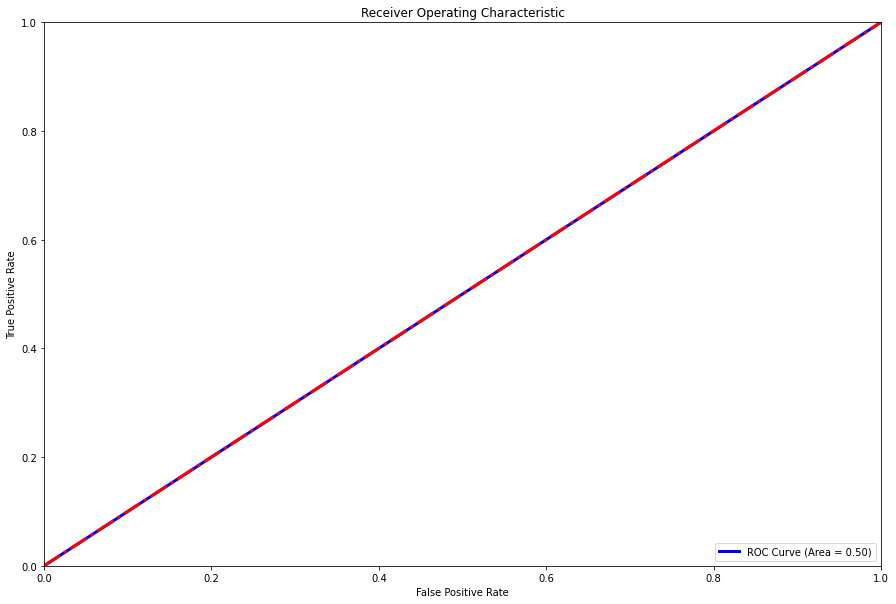

,TruePositive,True Negative,False Positive,False Negative,Accuracy,Mis-Classification,True Negative Rate (Specificity),Precision,F_1 Score,False Positive Rate,True Positive Rate (Sensitivity),Area,tss,hss
Values,0,142153,0,246,0.998272,0.001728,1.0,NaN,NaN,1.0,1.0,0.5,0.0,0.0


In [25]:
import matplotlib.pyplot as plt

TPlstm = cm[1][1]
TNlstm = cm[0][0]
FPlstm = cm[0][1]
FNlstm = cm[1][0]

conf_accuracylstm = (float (TPlstm+TNlstm) / float(TPlstm + TNlstm + FPlstm + FNlstm))
conf_misclassification = 1- conf_accuracylstm
conf_sensitivity = (TPlstm / float(TPlstm + FNlstm))
conf_specificity = (TNlstm / float(TNlstm + FPlstm))
conf_precision = (TPlstm/ float(TPlstm+ FPlstm))
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
tsslstm=conf_sensitivity-(1-conf_specificity)
hsslstm=(2*(TPlstm*TNlstm-FPlstm*FNlstm))/(((TPlstm+FNlstm)*(FNlstm+TNlstm))+((TPlstm+FPlstm)*(FPlstm+TNlstm)))

fpr, tpr, thresholds = roc_curve(y_test, y_predd,pos_label=1)
ras=roc_auc_score(y_test, y_predd)

print('\nThreshold:',thresholds)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr, color='blue', lw=3, label='ROC Curve (Area = %0.2f)' % ras,linestyle='solid')
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

df=pd.DataFrame({"TruePositive":TPlstm,"True Negative":TNlstm,"False Positive":FPlstm,"False Negative":FNlstm,"Accuracy":conf_accuracylstm,"Mis-Classification":conf_misclassification,"True Negative Rate (Specificity)":conf_specificity,"Precision":conf_precision,"F_1 Score":conf_f1,"False Positive Rate":fpr[1],"True Positive Rate (Sensitivity)":tpr[1],"Area":ras,"tss":tsslstm,"hss":hsslstm},index=["Values"])
df

In [26]:
from prettytable import PrettyTable 

In [28]:
# Specify the Column Names while initializing the Table


mAucrfAl = sum(mAucrf)/len(mAucrf)
mAucKnnAl = sum(mAucKnn)/len(mAucKnn)
conf_accuracylstm = conf_accuracylstm * 100

myTable = PrettyTable(["Name", "Accuracy","TP","TN","FP","FN","TSS","HSS"])




# Add rows
myTable.add_row(["RANDOM FOREST", mAucrfAl,TPrf,TNrf,FPrf,FNrf,tssrf,hssrf])
myTable.add_row(["KNN", mAucKnnAl, TPKnn,TNKnn,FPKnn,FNKnn,tssKnn,hssKnn])
myTable.add_row(["LSTM", conf_accuracylstm, TPlstm,TNlstm,FPlstm,FNlstm,tsslstm,hsslstm])

print(myTable)


+---------------+-------------------+----+--------+----+-----+--------------------+--------------------+
|      Name     |      Accuracy     | TP |   TN   | FP |  FN |        TSS         |        HSS         |
+---------------+-------------------+----+--------+----+-----+--------------------+--------------------+
| RANDOM FOREST | 99.95681287031883 | 40 | 28429  | 2  |  9  | 0.8162561848628869 | 0.8789285984810424 |
|      KNN      | 99.95540837593681 | 40 | 28428  | 3  |  9  | 0.8162210119882077 | 0.8693551013667713 |
|      LSTM     | 99.82724597785096 | 0  | 142153 | 0  | 246 |        0.0         |        0.0         |
+---------------+-------------------+----+--------+----+-----+--------------------+--------------------+
